<a href="https://colab.research.google.com/github/MarilinaG/data/blob/main/%CE%A0%CF%84%CF%85%CF%87%CE%B9%CE%B1%CE%BA%CE%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import trapezoid
from scipy.integrate import cumulative_trapezoid
from scipy.integrate import simpson

In [8]:
!git clone https://github.com/MarilinaG/data

Cloning into 'data'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), done.


In [9]:
erest_pion   = 1e8
erest_proton = 1e9

In [10]:
def threshold(e_obs):
  e_g = 1e-2 * (e_obs) #e_obs in GeV
  e_th = (erest_pion * erest_proton)/(e_g * 1e9)
  return e_th

In [11]:
threshold(1e-3)/1e12

10.0

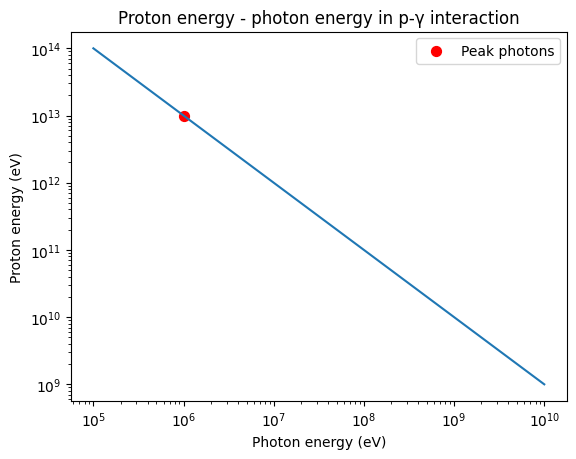

In [12]:
energies_obs = np.logspace(-4, 1)
e_th         = []

for e in energies_obs:
  e_th.append(threshold(e))

plt.loglog(energies_obs*1e9, e_th)
plt.scatter(1e6, threshold(1e-3), color='red', s=50, label="Peak photons")
plt.xlabel('Photon energy (eV)')
plt.ylabel('Proton energy (eV)')
plt.title('Proton energy - photon energy in p-γ interaction')
plt.legend()
plt.show()

In [13]:
a_g     = -1.1
b_g     = -2.2
z       = 2
c       = 3e10
m_p     = 1.672e-24
q_p     = 4.8e-10

e_iso   = 1e55
eta_rad = 0.01
t_v     = 0.1
g       = 100
t_dur   = 10
delta   = 2*g
sigma_T = 6.65e-25
sigma_0 = 1.5e-4*sigma_T

eth_bar = 145e6 * 1.602e-12

r_is    = (2*c*t_v * g**2)/(1+z)
d_shock = r_is / (2*g)
# print(eth_bar)

In [14]:
#eg_peak calculation
eg_iso      = eta_rad * e_iso
eg_iso_bar  = (1+z)*eg_iso
eg_peak_bar = 80 * (eg_iso_bar/1e52)**0.57 #keV
eg_peak     = eg_peak_bar/(1+z) #keV
print(eg_peak)

#eg_critical calculation
eg_c = ((a_g-b_g)/(a_g+2)) * eg_peak
print(eg_c)

#luminosity calculation
L = eg_iso / t_dur
print(L)

185.32237081480568
226.50511988476256
1e+52


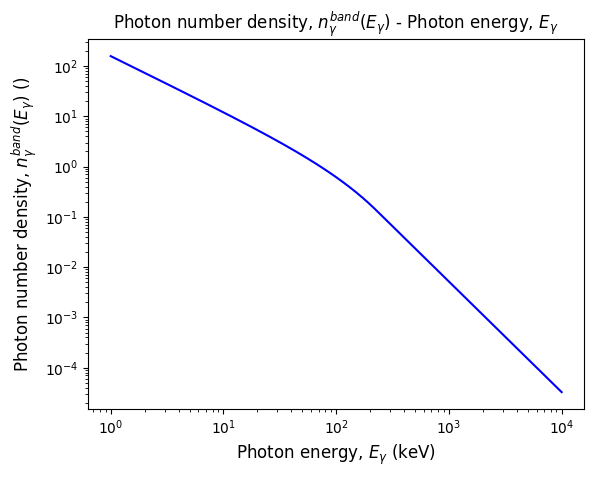

In [15]:
#Band function

def band_function(e_g):
  if e_g < eg_c:
    n = (e_g/100)**a_g * np.exp(-(a_g+2)*e_g/eg_peak)
    return n
  else:
    n = (e_g/100)**b_g * np.exp(b_g-a_g) * (eg_c/100)**(a_g-b_g)
    return n

egs = np.logspace(0, 4, 400)
ngs = np.array([band_function(e_g) for e_g in egs])
plt.loglog(egs, ngs, label='Band Function', color='blue')
plt.xlabel("Photon energy, $E_\gamma$ (keV)", fontsize=12)
plt.ylabel("Photon number density, $n_\gamma^{band}(E_\gamma)$ ()", fontsize=12)
plt.title("Photon number density, $n_\gamma^{band}(E_\gamma)$ - Photon energy, $E_\gamma$")
plt.show()

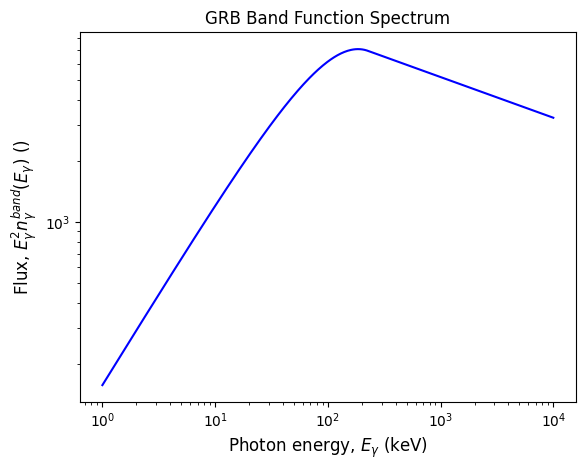

In [16]:
spec = egs**2 * ngs
plt.loglog(egs, spec, label='Band Function', color='blue')
plt.xlabel("Photon energy, $E_\gamma$ (keV)", fontsize=12)
plt.ylabel("Flux, $E_\gamma^2 n_\gamma^{band}(E_\gamma)$ ()", fontsize=12)
plt.title("GRB Band Function Spectrum")
plt.show()

In [17]:
# #energy density s.r.f.

# uph_shock = (eta_rad*e_iso* (1+z)**2)/(256*np.pi*t_dur* t_v**2 * c**3 * g**8)
# print(uph_shock)

# #number density s.r.f.

# # def n_shock(e_shock):
# #   n_shock = u_shock / e_shock**2
# #   return n_shock

# # egs       = np.logspace(0, 4, 400)
# # ngs_shock = np.array([n_shock(e_g) for e_g in egs])
# # plt.loglog(egs, ngs_shock)
# # plt.xlabel("Photon energy, $E_\gamma'$ (keV)", fontsize=12)
# # plt.ylabel("Photon number density (s.r.f.), $n_\gamma'(E_\gamma')$ ()", fontsize=12)
# # plt.title("Photon number density (s.r.f.), $n_\gamma'(E_\gamma')$ - Photon energy, $E_\gamma'$")
# # plt.show()

In [18]:
# eta_b    = 0.5
# ub_shock = eta_b * uph_shock
# B        = np.sqrt(8*np.pi*ub_shock)

# def rg_shock(g_p):
#   rg_shock = ((m_p* c**2)/(q_p*B)) * g_p * np.sqrt(1-1/g_p**2)
#   return rg_shock

# gp_threshold = np.sqrt(((q_p*B*d_shock)/(m_p* c**2))+1)
# print(gp_threshold)

In [19]:
# #t_pg_inv

# e_peak = 1.602e-7

# def t_pg_inv(g_p):
#   t_pg_inv = ((sigma_0*eta_rad*e_iso*(1+z))/(640*np.pi*t_dur*t_v * c**2 * e_peak**3 * g**4)) * (e_peak/g)**2 * (1 - (gp_threshold/g_p)**2)
#   return t_pg_inv

In [20]:
# g_ps      = np.logspace(np.log10(gp_threshold), 7, 400)
# t_pgs_inv = np.array([t_pg_inv(g_p) for g_p in g_ps])

In [21]:
# plt.loglog(g_ps, t_pgs_inv)
# plt.xlabel("Proton lorentz factor, $\gamma_p$", fontsize=12)
# plt.ylabel("Proton energy loss rate, $t_{p\gamma}^{-1}$ (1/s)", fontsize=12)
# plt.title("Proton energy loss rate, $t_{p\gamma}$ - Proton lorentz factor, $\gamma_p$")
# plt.show()

In [22]:
# #t_esc

# t_esc = d_shock/c

In [23]:
# #f_pg

# f_pg = t_esc * t_pgs_inv
# plt.loglog(g_ps, t_pgs_inv)
# plt.xlabel("Proton lorentz factor, $\gamma_p$", fontsize=12)
# plt.ylabel("Optical depth, $f_{p\gamma}$", fontsize=12)
# plt.title("Optical depth, $f_{p\gamma}$ - Proton lorentz factor, $\gamma_p$")
# plt.show()

In [107]:
def u_ph(eta_rad, e_iso, t_v, t_dur, g):
  u_ph = (eta_rad*e_iso* (1+z)**2)/(256*np.pi*t_dur* t_v**2 * c**3 * g**8)
  return u_ph

def gp_thres(g, e_peak):
  gp_thres = (eth_bar/e_peak)*g
  return gp_thres

def gp_max(eta_rad, e_iso, t_dur, g, eta_b, t_v):
  ub_shock = eta_b * u_ph(eta_rad, e_iso, t_v, t_dur, g)
  B        = np.sqrt(8*np.pi*ub_shock)
  gp_max   = np.sqrt(((q_p*B*c*t_v*g)/(m_p* c**2 * (1+z)))**2+1)
  return gp_max

def delta_shock(g, t_v):
  r_is    = (2*c*t_v * g**2)/(1+z)
  d_shock = r_is / (2*g)
  return d_shock

def t_esc(g, t_v):
  d_shock = delta_shock(g, t_v)
  t_esc   = d_shock/c
  return t_esc

def optical_depth(eta_rad, e_iso, t_dur, g_p, g, e_peak, eta_b, t_v):
  f = t_esc(g, t_v) * ((2 * c * sigma_0 * u_ph(eta_rad, e_iso, t_v, t_dur, g))/(5)) * (g/e_peak) * (1 - (gp_thres(g, e_peak)/g_p)**2)
  #f = ((sigma_0*eta_rad*e_iso*(1+z))/(640*np.pi*t_dur*t_v * c**2)) * (1/e_peak) * (1/g**6) * (1 - (gp_thres(g, e_peak)/g_p)**2)
  return f

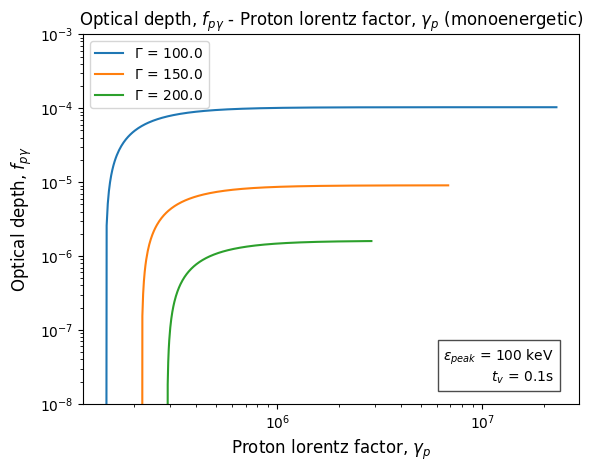

In [108]:
g1 = 1e2
g2 = 1.5e2
g3 = 2e2
gs = [g1, g2, g3]

e_peak1    = 1.602e-7
e_peak2    = 5 * 1.602e-7
e_peak3    = 1.602e-6
e_peaks    = [e_peak1, e_peak2, e_peak3]
e_peaks_ev = ["100 keV", "500 keV", "1 MeV"]

t_v1 = 0.01
t_v2 = 0.1
t_v3 = 1
tvs  = [t_v1, t_v2, t_v3]

for i in range(len(gs)):
  gps = np.logspace(np.log10(gp_thres(gs[i], e_peak1)), np.log10(gp_max(0.01, 1e55, 10, gs[i], 0.5, t_v2)), 400)
  plt.loglog(gps, np.array([optical_depth(0.01, 1e55, 10, g_p, gs[i], e_peak1, 0.5, t_v2) for g_p in gps]), label=f'$\Gamma$ = {gs[i]}')
  plt.xlabel("Proton lorentz factor, $\gamma_p$", fontsize=12)
  plt.ylabel("Optical depth, $f_{p\gamma}$", fontsize=12)
  plt.ylim(1e-8, 1e-3)
  plt.title("Optical depth, $f_{p\gamma}$ - Proton lorentz factor, $\gamma_p$ (monoenergetic)")
  plt.legend(loc='upper left')

plt.text(
    0.95, 0.05,
    '$\epsilon_{{peak}}$ = 100 keV \n $t_v$ = 0.1s',
    transform=plt.gca().transAxes,
    ha='right', va='bottom',
    bbox=dict(facecolor='white', alpha=0.7)
)
plt.show()

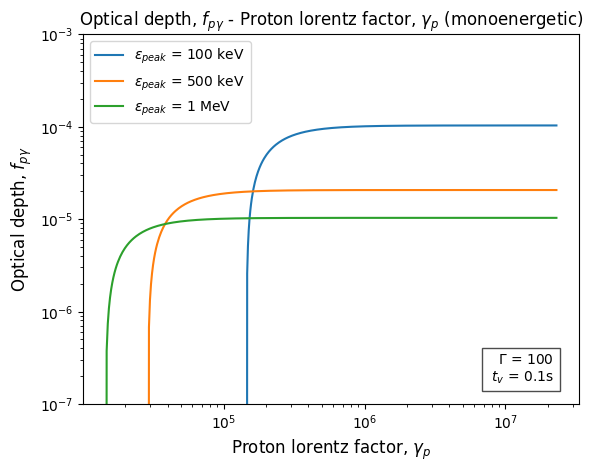

In [109]:
for i in range(len(e_peaks)):
  gps = np.logspace(np.log10(gp_thres(g1, e_peaks[i])), np.log10(gp_max(0.01, 1e55, 10, g1, 0.5, t_v2)), 400)
  plt.loglog(gps, np.array([optical_depth(0.01, 1e55, 10, g_p, g1, e_peaks[i], 0.5, t_v2) for g_p in gps]), label=f'$\epsilon_{{peak}}$ = {e_peaks_ev[i]}')
  plt.xlabel("Proton lorentz factor, $\gamma_p$", fontsize=12)
  plt.ylabel("Optical depth, $f_{p\gamma}$", fontsize=12)
  plt.ylim(1e-7, 1e-3)
  plt.title("Optical depth, $f_{p\gamma}$ - Proton lorentz factor, $\gamma_p$ (monoenergetic)")
  plt.legend(loc='upper left')

plt.text(
    0.95, 0.05,
    '$\Gamma$ = 100 \n $t_v$ = 0.1s',
    transform=plt.gca().transAxes,
    ha='right', va='bottom',
    bbox=dict(facecolor='white', alpha=0.7)
)
plt.show()

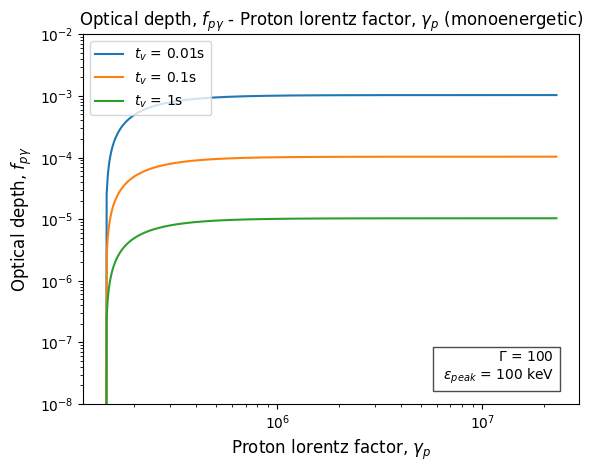

In [110]:
for i in range(len(tvs)):
  gps = np.logspace(np.log10(gp_thres(g1, e_peak1)), np.log10(gp_max(0.01, 1e55, 10, g1, 0.5, tvs[i])), 400)
  plt.loglog(gps, np.array([optical_depth(0.01, 1e55, 10, g_p, g, e_peak1, 0.5, tvs[i]) for g_p in gps]), label=f'$t_v$ = {tvs[i]}s')
  plt.xlabel("Proton lorentz factor, $\gamma_p$", fontsize=12)
  plt.ylabel("Optical depth, $f_{p\gamma}$", fontsize=12)
  plt.ylim(1e-8, 1e-2)
  plt.title("Optical depth, $f_{p\gamma}$ - Proton lorentz factor, $\gamma_p$ (monoenergetic)")
  plt.legend(loc='upper left')

plt.text(
    0.95, 0.05,
    '$\Gamma$ = 100 \n $\epsilon_{{peak}}$ = 100 keV',
    transform=plt.gca().transAxes,
    ha='right', va='bottom',
    bbox=dict(facecolor='white', alpha=0.7)
)
plt.show()

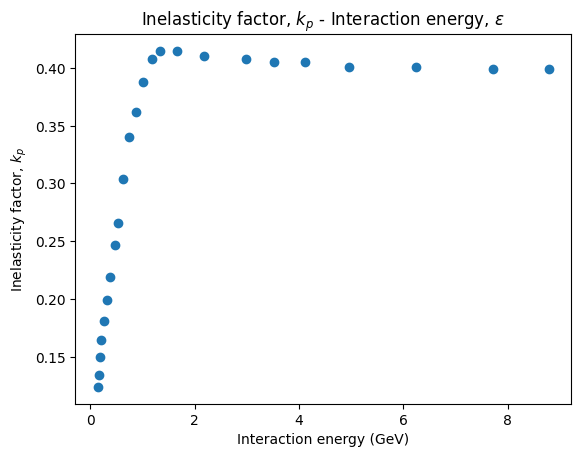

In [104]:
#kp values from file

kp_data = np.loadtxt('data/kp_pg.txt')

inter_energies_kp_gev = kp_data[:, 0]
inter_energies_kp     = kp_data[:, 0] * 1.602e-3 #converted GeV to erg
kps                   = kp_data[:, 1]

plt.scatter(inter_energies_kp_gev, kps)
plt.xlabel('Interaction energy (GeV)')
plt.ylabel('Inelasticity factor, $k_p$')
plt.title('Inelasticity factor, $k_p$ - Interaction energy, $\epsilon$')
plt.show()

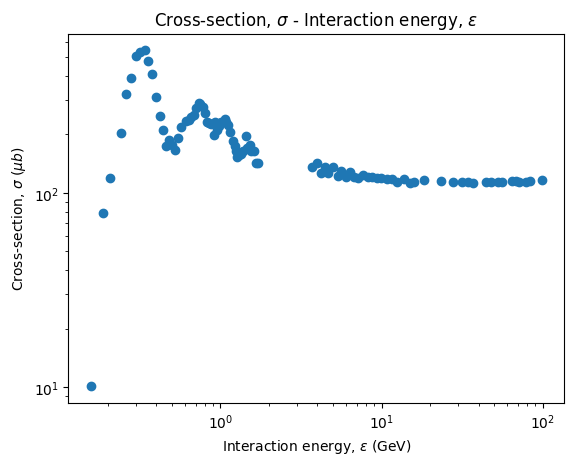

In [105]:
#cross section values from file

cs_data = np.loadtxt('data/cross_section.txt')

inter_energies_cs_gev = cs_data[:, 0]
inter_energies_cs     = cs_data[:, 0] * 1.602e-3 #converted GeV to erg
cs_microbarn          = cs_data[:, 1]
cs                    = cs_data[:, 1] * 1e-30 #converted μb to cm^2

plt.scatter(inter_energies_cs_gev, cs_microbarn)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Interaction energy, $\epsilon$ (GeV)')
plt.ylabel('Cross-section, $\sigma$ ($\mu b$)')
plt.title('Cross-section, $\sigma$ - Interaction energy, $\epsilon$')
plt.show()

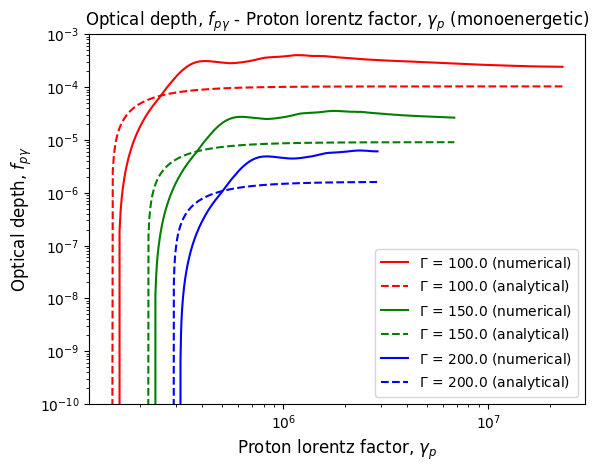

In [112]:
# kps_interp = interp1d(inter_energies_kp, kps, kind='linear', bounds_error=False, fill_value=0)
# cs_interp  = interp1d(inter_energies_cs, cs, kind='linear', bounds_error=False, fill_value=0)
# e_common   = np.linspace(max(min(inter_energies_kp), min(inter_energies_cs)), min(max(inter_energies_kp), max(inter_energies_cs)), 100)

def integral(g_p, g, e_peak):
  lower_limit = eth_bar
  upper_limit = 2*g_p*((e_peak)/(2*g))
  energies_log = np.linspace(np.log(lower_limit), np.log(upper_limit), 100)
  # kps_interp    = interp1d(inter_energies_kp, kps, bounds_error=False, fill_value=0)
  # kps_resampled = kps_interp(inter_energies_cs)
  kps_resampled = np.interp(np.exp(energies_log), inter_energies_kp, kps)
  cs_resampled  = np.interp(np.exp(energies_log), inter_energies_cs, cs)
  integrand = cs_resampled * kps_resampled * np.exp(energies_log)**2
  integral  = simpson(integrand, x=energies_log)
  return integral

def optical_depth_numerical(eta_rad, e_iso, t_dur, g_p, g, e_peak, t_v):
  f = t_esc(g, t_v) * ((c * u_ph(eta_rad, e_iso, t_v, t_dur, g))/(2*g_p**2)) * ((2*g)/e_peak)**3 * integral(g_p, g, e_peak)
  return f

colors = ['r', 'g', 'b']
for i in range(len(gs)):
  gps = np.logspace(np.log10(gp_thres(gs[i], e_peak1)), np.log10(gp_max(0.01, 1e55, 10, gs[i], 0.5, t_v2)), 400)
  plt.loglog(gps, np.array([optical_depth_numerical(0.01, 1e55, 10, g_p, gs[i], e_peak1, t_v2) for g_p in gps]), color = colors[i], label=f'$\Gamma$ = {gs[i]} (numerical)')
  plt.loglog(gps, np.array([optical_depth(0.01, 1e55, 10, g_p, gs[i], e_peak1, 0.5, t_v2) for g_p in gps]), color = colors[i], label=f'$\Gamma$ = {gs[i]} (analytical)', linestyle='dashed')
  plt.xlabel("Proton lorentz factor, $\gamma_p$", fontsize=12)
  plt.ylabel("Optical depth, $f_{p\gamma}$", fontsize=12)
  plt.ylim(1e-10, 1e-3)
  plt.title("Optical depth, $f_{p\gamma}$ - Proton lorentz factor, $\gamma_p$ (monoenergetic)")
  plt.legend(loc='lower right')

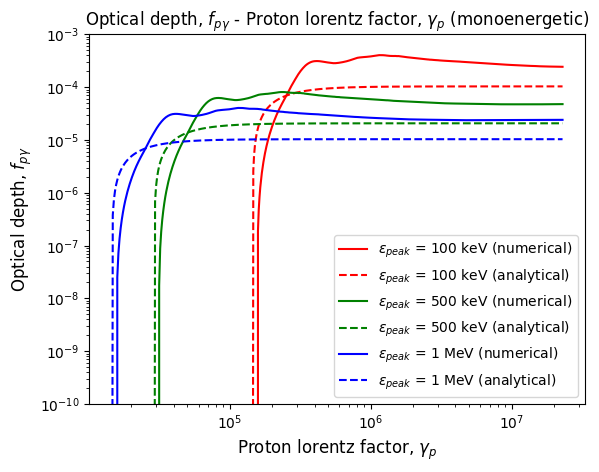

In [113]:
e_peaks    = [e_peak1, e_peak2, e_peak3]
e_peaks_ev = ["100 keV", "500 keV", "1 MeV"]

for i in range(len(e_peaks)):
  gps = np.logspace(np.log10(gp_thres(g1, e_peaks[i])), np.log10(gp_max(0.01, 1e55, 10, g1, 0.5, t_v2)), 400)
  plt.loglog(gps, np.array([optical_depth_numerical(0.01, 1e55, 10, g_p, g1, e_peaks[i], t_v2) for g_p in gps]), color = colors[i], label=f'$\epsilon_{{peak}}$ = {e_peaks_ev[i]} (numerical)')
  plt.loglog(gps, np.array([optical_depth(0.01, 1e55, 10, g_p, g1, e_peaks[i], 0.5, t_v2) for g_p in gps]), color = colors[i], label=f'$\epsilon_{{peak}}$ = {e_peaks_ev[i]} (analytical)', linestyle='dashed')
  plt.xlabel("Proton lorentz factor, $\gamma_p$", fontsize=12)
  plt.ylabel("Optical depth, $f_{p\gamma}$", fontsize=12)
  plt.ylim(1e-10, 1e-3)
  plt.title("Optical depth, $f_{p\gamma}$ - Proton lorentz factor, $\gamma_p$ (monoenergetic)")
  plt.legend(loc='lower right')

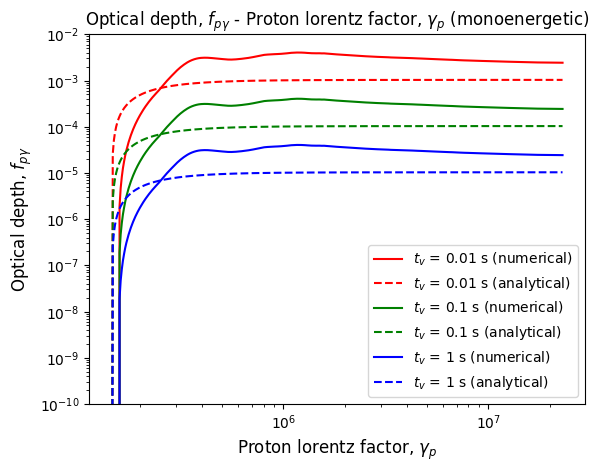

In [114]:
for i in range(len(tvs)):
  gps = np.logspace(np.log10(gp_thres(g1, e_peak1)), np.log10(gp_max(0.01, 1e55, 10, g1, 0.5, tvs[i])), 400)
  plt.loglog(gps, np.array([optical_depth_numerical(0.01, 1e55, 10, g_p, g, e_peak1, tvs[i]) for g_p in gps]), color = colors[i], label=f'$t_v$ = {tvs[i]} s (numerical)')
  plt.loglog(gps, np.array([optical_depth(0.01, 1e55, 10, g_p, g, e_peak1, 0.5, tvs[i]) for g_p in gps]), color = colors[i], label=f'$t_v$ = {tvs[i]} s (analytical)', linestyle='dashed')
  plt.xlabel("Proton lorentz factor, $\gamma_p$", fontsize=12)
  plt.ylabel("Optical depth, $f_{p\gamma}$", fontsize=12)
  plt.ylim(1e-10, 1e-2)
  plt.title("Optical depth, $f_{p\gamma}$ - Proton lorentz factor, $\gamma_p$ (monoenergetic)")
  plt.legend(loc='lower right')

Using broken power law

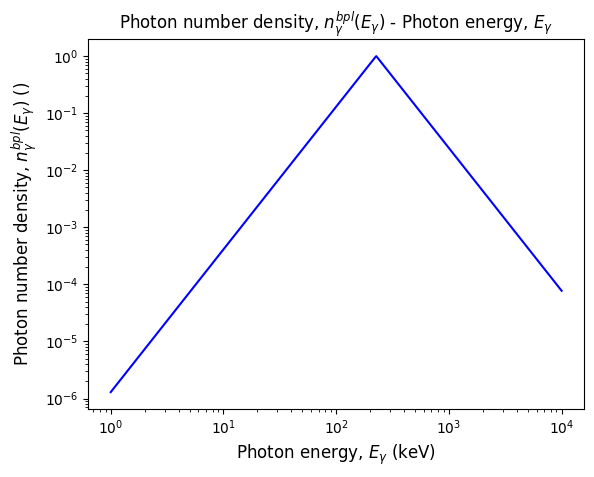

In [33]:
#Broken power law

a_g     = 2.5
b_g     = -2.5

# def broken_pl(e_g):
#   if e_g < eg_c:
#     n = (e_g/100)**a_g / (eg_c/100)**a_g
#     return n
#   else:
#     n = (e_g/100)**b_g * (eg_c/100)**(a_g-b_g) / (eg_c/100)**a_g
#     return n

def broken_pl(e_g):
  if e_g < eg_c:
    n = (e_g/eg_c)**a_g
    return n
  else:
    n = (e_g/eg_c)**b_g
    return n

egs_pl = np.logspace(0, 4, 400)
ngs_pl = np.array([broken_pl(e_g) for e_g in egs])
plt.loglog(egs_pl, ngs_pl, label='Broken Power Law', color='blue')
plt.xlabel("Photon energy, $E_\gamma$ (keV)", fontsize=12)
plt.ylabel("Photon number density, $n_\gamma^{bpl}(E_\gamma)$ ()", fontsize=12)
plt.title("Photon number density, $n_\gamma^{bpl}(E_\gamma)$ - Photon energy, $E_\gamma$")
plt.show()

In [120]:
# def eg_critical(e_peak):
#   eg_critical = ((a_g-b_g)/(a_g+2)) * e_peak
#   return eg_critical

def u_ph(eta_rad, e_iso, t_v, t_dur, g):
  u_ph = (eta_rad*e_iso* (1+z)**2)/(256*np.pi*t_dur* t_v**2 * c**3 * g**8)
  return u_ph

def gp_thres(g, e_peak):
  gp_thres = (eth_bar/e_peak)*g
  return gp_thres

def gp_max(eta_rad, e_iso, t_dur, g, eta_b, t_v):
  ub_shock = eta_b * u_ph(eta_rad, e_iso, t_v, t_dur, g)
  B        = np.sqrt(8*np.pi*ub_shock)
  gp_max   = np.sqrt(((q_p*B*c*t_v*g)/(m_p* c**2 * (1+z)))**2+1)
  return gp_max

def delta_shock(g, t_v):
  r_is    = (2*c*t_v * g**2)/(1+z)
  d_shock = r_is / (2*g)
  return d_shock

def t_esc(g, t_v):
  d_shock = delta_shock(g, t_v)
  t_esc   = d_shock/c
  return t_esc

In [35]:
# e_ref       = 1.602e-7 #100 keV

# def D(g, t_v, e_peak):
#   D = u_ph(g, t_v) * ((a_g+2)*(e_ref/(2*g))**a_g)/(((b_g-a_g)/(b_g+2))*(eg_critical(e_peak)/(2*g))**(a_g+2))# - (eth_bar/(2*g_p))**(a_g+2))
#   #D = u_ph(g, t_v) * ((a_g+2)*(e_ref/(2*g))**a_g)/(((b_g-a_g)/(b_g+2))*(eg_critical(e_peak)/(2*g))**(a_g+2) - (eth_bar/(2*g_p))**(a_g+2))
#   return D

In [36]:
# def optical_depth_bpl(g_p, g, e_peak, eta_b, t_v):
#   f = t_esc(g, t_v) * ((c * sigma_0 * D(g, t_v, e_peak)) / (10 * g_p**2 * (1-a_g) * (e_ref/(2*g))**a_g)) * ((2*g_p*(eg_critical(e_peak)/(2*g))**a_g)/a_g - (((2*g_p)**(1-a_g)) * (eth_bar**a_g)/a_g) + ((b_g-a_g)/(1-b_g))*2*g_p*(eg_critical(e_peak)/(2*g))**a_g - ((b_g-a_g)/(1-b_g))*(eg_critical(e_peak)/(2*g))**(a_g-1)*eth_bar)
#   return f

In [37]:
# e_ref = 1.602e-7 #100 keV

# def D(g, t_v, e_peak):
#   D = u_ph(g, t_v) * (a_g+2) * (e_ref/(2*g))**a_g * ((b_g+2)/((b_g-a_g)*(eg_critical(e_peak)/(2*g))**(a_g+2)))
#   return D

In [38]:
# def optical_depth_bpl(g_p, g, e_peak, eta_b, t_v):
#   f = t_esc(g, t_v) * ((sigma_0*c*D(g, t_v, e_peak)*(e_ref/(2*g))**(-a_g))/(10 * g_p**2 * (1-a_g))) * (((2*g_p)/a_g)*((eg_critical(e_peak)/(2*g))**a_g) - (((2*g_p)**(1-a_g))/a_g)*(eth_bar**a_g) + ((b_g-a_g)/(1-b_g))*2*g_p*(eg_critical(e_peak)/(2*g))**a_g - ((b_g-a_g)/(1-b_g))*(eg_critical(e_peak)/(2*g))**(a_g-1) * eth_bar)
#   return f

In [39]:
# (eg_critical(e_peak)/(2*g))

# (e_ref/(2*g))

# (e_peak/(2*g))

In [122]:
#e_ref = 1.602e-7 #100 keV

def D(a_g, b_g, e_rad, e_iso, t_dur, g, t_v, e_peak):
  D = ((a_g+2)*(b_g+2)*u_ph(eta_rad, e_iso, t_v, t_dur, g))/((b_g-a_g)*((e_peak/(2*g))**2))
  return D

In [123]:
def optical_depth_bpl(a_g, b_g, e_rad, e_iso, t_dur, g_p, g, e_peak, eta_b, t_v):
  f = t_esc(g, t_v) * ((sigma_0*c*D(a_g, b_g, e_rad, e_iso, t_dur, g, t_v, e_peak))/(10*g_p**2)) * ( ((b_g-a_g-2)/((a_g+1)*(b_g-1)))*2*g_p**2*(e_peak/(2*g)) - ((b_g-a_g)/(2*(a_g-1)*(b_g-1)))*((2*g)/e_peak)*(eth_bar**2) + (1/((a_g-1)*(a_g+1)))*(2*g_p)**(1-a_g) * (e_peak/(2*g))**(-a_g) * (eth_bar)**(a_g+1))
  return f

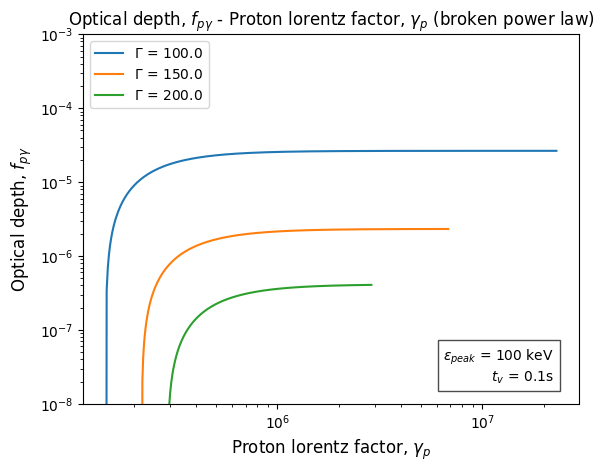

In [124]:
g1 = 1e2
g2 = 1.5e2
g3 = 2e2
gs = [g1, g2, g3]

e_peak1    = 1.602e-7
e_peak2    = 5 * 1.602e-7
e_peak3    = 1.602e-6
e_peaks    = [e_peak1, e_peak2, e_peak3]
e_peaks_ev = ["100 keV", "500 keV", "1 MeV"]

t_v1 = 0.01
t_v2 = 0.1
t_v3 = 1
tvs  = [t_v1, t_v2, t_v3]

for i in range(len(gs)):
  gps = np.logspace(np.log10(gp_thres(gs[i], e_peak1)), np.log10(gp_max(0.01, 1e55, 10, gs[i], 0.5, t_v2)), 400)
  plt.loglog(gps, np.array([optical_depth_bpl(2.5, -2.5, 0.01, 1e55, 10, g_p, gs[i], e_peak1, 0.5, t_v2) for g_p in gps]), label=f'$\Gamma$ = {gs[i]}')
  plt.xlabel("Proton lorentz factor, $\gamma_p$", fontsize=12)
  plt.ylabel("Optical depth, $f_{p\gamma}$", fontsize=12)
  plt.ylim(1e-8, 1e-3)
  plt.title("Optical depth, $f_{p\gamma}$ - Proton lorentz factor, $\gamma_p$ (broken power law)")
  plt.legend(loc='upper left')

plt.text(
    0.95, 0.05,
    '$\epsilon_{{peak}}$ = 100 keV \n $t_v$ = 0.1s',
    transform=plt.gca().transAxes,
    ha='right', va='bottom',
    bbox=dict(facecolor='white', alpha=0.7)
)
plt.show()

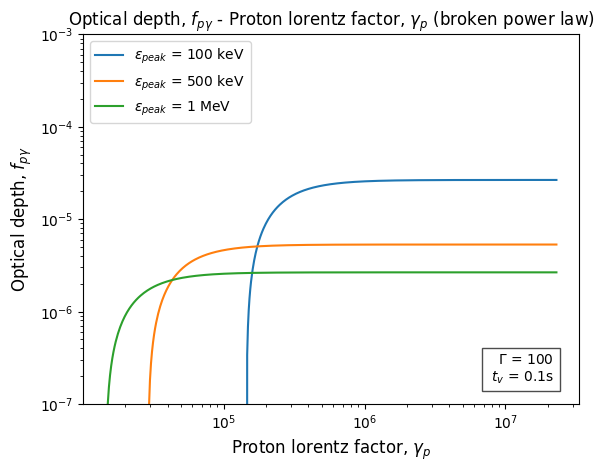

In [125]:
for i in range(len(e_peaks)):
  gps = np.logspace(np.log10(gp_thres(g1, e_peaks[i])), np.log10(gp_max(0.01, 1e55, 10, g1, 0.5, t_v2)), 400)
  plt.loglog(gps, np.array([optical_depth_bpl(2.5, -2.5, 0.01, 1e55, 10, g_p, g1, e_peaks[i], 0.5, t_v2) for g_p in gps]), label=f'$\epsilon_{{peak}}$ = {e_peaks_ev[i]}')
  plt.xlabel("Proton lorentz factor, $\gamma_p$", fontsize=12)
  plt.ylabel("Optical depth, $f_{p\gamma}$", fontsize=12)
  plt.ylim(1e-7, 1e-3)
  plt.title("Optical depth, $f_{p\gamma}$ - Proton lorentz factor, $\gamma_p$ (broken power law)")
  plt.legend(loc='upper left')

plt.text(
    0.95, 0.05,
    '$\Gamma$ = 100 \n $t_v$ = 0.1s',
    transform=plt.gca().transAxes,
    ha='right', va='bottom',
    bbox=dict(facecolor='white', alpha=0.7)
)
plt.show()

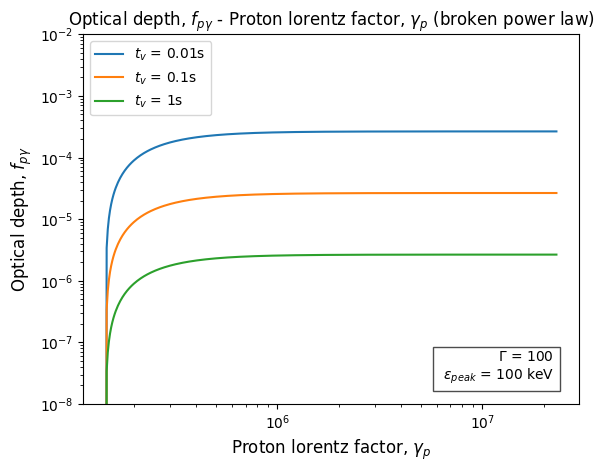

In [126]:
for i in range(len(tvs)):
  gps = np.logspace(np.log10(gp_thres(g1, e_peak1)), np.log10(gp_max(0.01, 1e55, 10, g1, 0.5, tvs[i])), 400)
  plt.loglog(gps, np.array([optical_depth_bpl(2.5, -2.5, 0.01, 1e55, 10, g_p, g, e_peak1, 0.5, tvs[i]) for g_p in gps]), label=f'$t_v$ = {tvs[i]}s')
  plt.xlabel("Proton lorentz factor, $\gamma_p$", fontsize=12)
  plt.ylabel("Optical depth, $f_{p\gamma}$", fontsize=12)
  plt.ylim(1e-8, 1e-2)
  plt.title("Optical depth, $f_{p\gamma}$ - Proton lorentz factor, $\gamma_p$ (broken power law)")
  plt.legend(loc='upper left')

plt.text(
    0.95, 0.05,
    '$\Gamma$ = 100 \n $\epsilon_{{peak}}$ = 100 keV',
    transform=plt.gca().transAxes,
    ha='right', va='bottom',
    bbox=dict(facecolor='white', alpha=0.7)
)
plt.show()

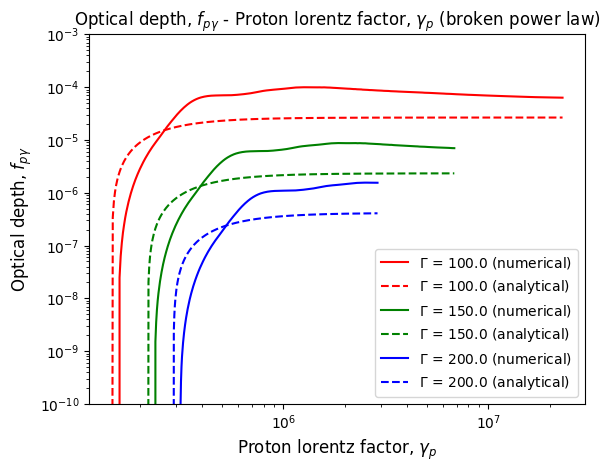

In [129]:
def integrals_bpl(g_p, g, e_peak):
  lower_limit_bpl = eth_bar
  upper_limit_bpl = 2*g_p*((e_peak)/(2*g))
  energies_log  = np.linspace(np.log(lower_limit_bpl), np.log(upper_limit_bpl), 100)
  kps_resampled = np.interp(np.exp(energies_log), inter_energies_kp, kps)
  cs_resampled  = np.interp(np.exp(energies_log), inter_energies_cs, cs)
  integrand1_bpl = cs_resampled * kps_resampled * np.exp(energies_log)**2
  integral1_bpl  = simpson(integrand1_bpl, x=energies_log)
  integrand2_bpl = cs_resampled * kps_resampled * np.exp(energies_log)**(a_g+1)
  integral2_bpl  = simpson(integrand2_bpl, x=energies_log)
  return integral1_bpl, integral2_bpl

def optical_depth_numerical_bpl(a_g, b_g, e_rad, e_iso, t_dur, g_p, g, e_peak, t_v):
  integral1, integral2 = integrals_bpl(g_p, g, e_peak)
  integrals = ((b_g-a_g)/(b_g-1)) * integral1 - (((2*g_p)**(1-a_g)) * ((e_peak/(2*g))**(1-a_g))) * integral2
  f = t_esc(g, t_v) * ((c * D(a_g, b_g, e_rad, e_iso, t_dur, g, t_v, e_peak))/(2*g_p**2 * (a_g-1) * (e_peak/(2*g)))) * integrals
  return f

colors = ['r', 'g', 'b']
for i in range(len(gs)):
  gps = np.logspace(np.log10(gp_thres(gs[i], e_peak1)), np.log10(gp_max(0.01, 1e55, 10, gs[i], 0.5, t_v2)), 400)
  plt.loglog(gps, np.array([optical_depth_numerical_bpl(2.5, -2.5, 0.01, 1e55, 10, g_p, gs[i], e_peak1, t_v2) for g_p in gps]), color = colors[i], label=f'$\Gamma$ = {gs[i]} (numerical)')
  plt.loglog(gps, np.array([optical_depth_bpl(2.5, -2.5, 0.01, 1e55, 10, g_p, gs[i], e_peak1, 0.5, t_v2) for g_p in gps]), color = colors[i], label=f'$\Gamma$ = {gs[i]} (analytical)', linestyle='dashed')
  plt.xlabel("Proton lorentz factor, $\gamma_p$", fontsize=12)
  plt.ylabel("Optical depth, $f_{p\gamma}$", fontsize=12)
  plt.ylim(1e-10, 1e-3)
  plt.title("Optical depth, $f_{p\gamma}$ - Proton lorentz factor, $\gamma_p$ (broken power law)")
  plt.legend(loc='lower right')

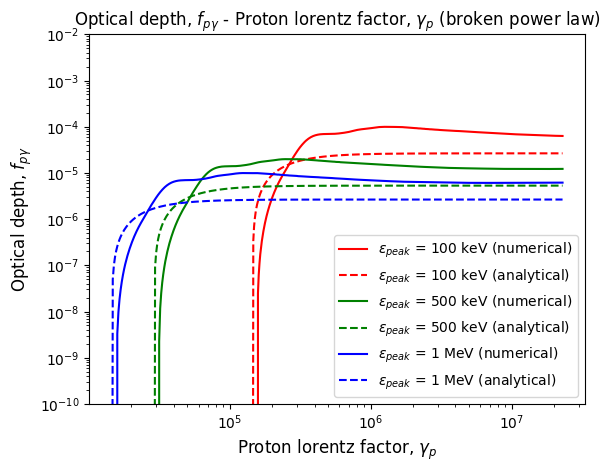

In [130]:
e_peaks    = [e_peak1, e_peak2, e_peak3]
e_peaks_ev = ["100 keV", "500 keV", "1 MeV"]

for i in range(len(e_peaks)):
  gps = np.logspace(np.log10(gp_thres(g1, e_peaks[i])), np.log10(gp_max(0.01, 1e55, 10, g1, 0.5, t_v2)), 400)
  plt.loglog(gps, np.array([optical_depth_numerical_bpl(2.5, -2.5, 0.01, 1e55, 10, g_p, g1, e_peaks[i], t_v2) for g_p in gps]), color = colors[i], label=f'$\epsilon_{{peak}}$ = {e_peaks_ev[i]} (numerical)')
  plt.loglog(gps, np.array([optical_depth_bpl(2.5, -2.5, 0.01, 1e55, 10, g_p, g1, e_peaks[i], 0.5, t_v2) for g_p in gps]), color = colors[i], label=f'$\epsilon_{{peak}}$ = {e_peaks_ev[i]} (analytical)', linestyle='dashed')
  plt.xlabel("Proton lorentz factor, $\gamma_p$", fontsize=12)
  plt.ylabel("Optical depth, $f_{p\gamma}$", fontsize=12)
  plt.ylim(1e-10, 1e-2)
  plt.title("Optical depth, $f_{p\gamma}$ - Proton lorentz factor, $\gamma_p$ (broken power law)")
  plt.legend(loc='lower right')

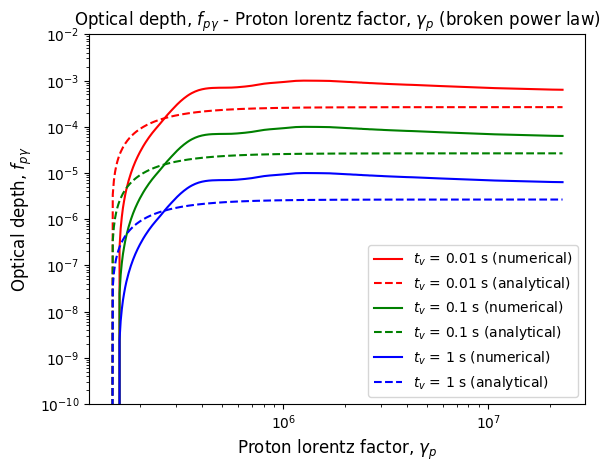

In [131]:
for i in range(len(tvs)):
  gps = np.logspace(np.log10(gp_thres(g1, e_peak1)), np.log10(gp_max(0.01, 1e55, 10, g1, 0.5, tvs[i])), 400)
  plt.loglog(gps, np.array([optical_depth_numerical_bpl(2.5, -2.5, 0.01, 1e55, 10, g_p, g, e_peak1, tvs[i]) for g_p in gps]), color = colors[i], label=f'$t_v$ = {tvs[i]} s (numerical)')
  plt.loglog(gps, np.array([optical_depth_bpl(2.5, -2.5, 0.01, 1e55, 10, g_p, g, e_peak1, 0.5, tvs[i]) for g_p in gps]), color = colors[i], label=f'$t_v$ = {tvs[i]} s (analytical)', linestyle='dashed')
  plt.xlabel("Proton lorentz factor, $\gamma_p$", fontsize=12)
  plt.ylabel("Optical depth, $f_{p\gamma}$", fontsize=12)
  plt.ylim(1e-10, 1e-2)
  plt.title("Optical depth, $f_{p\gamma}$ - Proton lorentz factor, $\gamma_p$ (broken power law)")
  plt.legend(loc='lower right')

Lπ

In [132]:
def spectrum(a_g, b_g, e_rad, e_iso, t_dur, g_p, g, e_peak, eta_b, t_v, s):
  sp = 0.5 * optical_depth_bpl(a_g, b_g, e_rad, e_iso, t_dur, g_p, g, e_peak, eta_b, t_v) * (g_p * m_p * c**2)**(-s+2)
  return sp

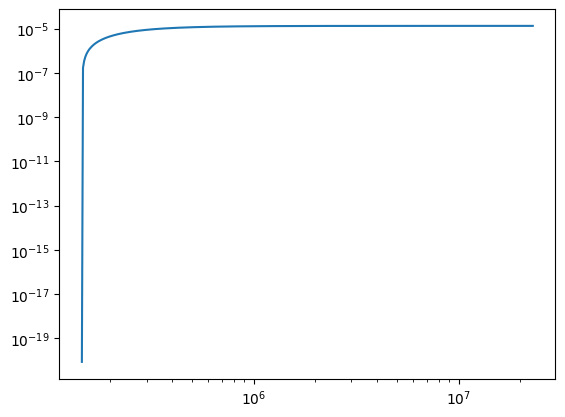

In [135]:
gps = np.logspace(np.log10(gp_thres(g1, e_peak1)), np.log10(gp_max(0.01, 1e55, 10, g1, 0.5, t_v2)), 400)
sps = spectrum(2.5, -2.5, 0.01, 1e55, 10, gps, g1, e_peak1, 0.5, t_v2, 2)
plt.loglog(gps, sps)
plt.show()